<a href="https://colab.research.google.com/github/Aboli-2002/Deep_learning/blob/main/Binary_classification_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
!pip install joblib

# Binary Classification with keras

In [136]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data ingestion

In [137]:
url1 ="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/booking_train.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/booking_train.csv


In [138]:
import pandas as pd
df = pd.read_csv(url1)
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


# Booking Status is target feature
1. 0-Booking Successful
2. 1-Booking Cancelled

# Step 2 - Perfom Basic Data Quality Checks

In [139]:
df.shape

(42100, 19)

In [140]:
df.duplicated().sum()

np.int64(0)

In [141]:
df.isna().sum()

,0
id,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

# Step 3 - Seperate X and Y (booking_status)

In [143]:
X = df.drop(columns=["id", "booking_status"])
Y = df["booking_status"]

In [144]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [145]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


In [146]:
Y.value_counts()

,count
booking_status,
0,25596
1,16504


<Axes: xlabel='booking_status'>

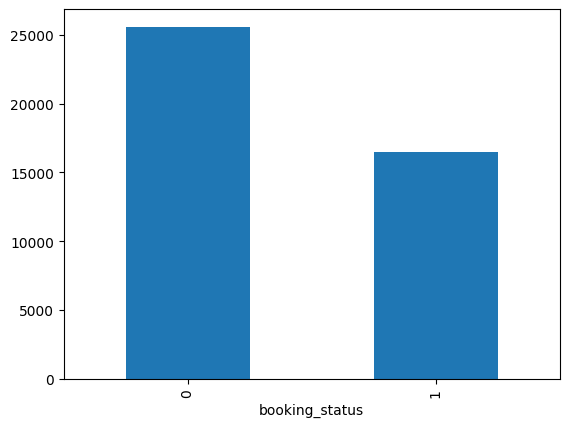

In [147]:
Y.value_counts().plot(kind="bar")

# Step 4 - Apply Preprocessing on X

In [148]:
X.dtypes

,0
no_of_adults,int64
no_of_children,int64
no_of_weekend_nights,int64
no_of_week_nights,int64
type_of_meal_plan,int64
required_car_parking_space,int64
room_type_reserved,int64
lead_time,int64
arrival_year,int64
arrival_month,int64


In [149]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [150]:
num_pipe = make_pipeline(
    SimpleImputer(strategy = "median"),
    StandardScaler()
).set_output(transform="pandas")

In [151]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


# Step 5 -Train Test and  Validation Split

In [152]:
from sklearn.model_selection import train_test_split
xtemp, xtest, ytemp, ytest = train_test_split(
    X_pre, Y, test_size=0.2, random_state=42, stratify=Y
)

In [153]:
xtemp.shape

(33680, 17)

In [154]:
xtest.shape

(8420, 17)

In [155]:
# Splitting validation and train data
xtrain, xval, ytrain, yval = train_test_split(
    xtemp, ytemp, test_size=0.2, random_state=42, stratify=ytemp
)

In [156]:
xtrain.shape

(26944, 17)

In [157]:
xval.shape

(6736, 17)

In [158]:
xtest.shape

(8420, 17)

In [159]:
xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
6060,0.151040,-0.313454,0.130259,1.122386,-0.40702,-0.160945,0.685890,-1.145799,-2.441040,1.557404,0.798456,-1.149928,-0.173408,-0.060506,-0.101479,-0.796106,-0.737691
9835,-1.753925,-0.313454,0.130259,-0.278849,-0.40702,-0.160945,-0.515173,0.124734,0.409661,-0.209778,-1.676659,-1.149928,-0.173408,-0.060506,-0.101479,-0.796106,0.552579
28120,2.056005,-0.313454,1.259332,0.421768,-0.40702,-0.160945,0.685890,-1.047116,0.409661,-1.976961,0.348435,0.428551,-0.173408,-0.060506,-0.101479,0.684828,-0.737691
25399,-1.753925,-0.313454,-0.998814,-1.680084,-0.40702,-0.160945,0.685890,-0.985440,0.409661,-0.563215,0.685950,5.163989,-0.173408,-0.060506,-0.101479,-2.815562,-0.737691
11140,0.151040,-0.313454,1.259332,0.421768,-0.40702,-0.160945,-0.515173,0.396110,0.409661,-0.916652,1.248477,0.428551,-0.173408,-0.060506,-0.101479,0.025677,0.552579


In [160]:
ytrain.head()

,booking_status
6060,0
9835,0
28120,1
25399,0
11140,0


In [161]:
xval.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15841,0.151040,-0.313454,-0.998814,-0.278849,-0.40702,-0.160945,-0.515173,-0.405683,0.409661,-0.916652,0.910961,-1.149928,-0.173408,-0.060506,-0.101479,-0.392215,0.552579
36665,0.151040,-0.313454,0.130259,0.421768,-0.40702,-0.160945,-0.515173,0.914191,0.409661,0.143658,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,-0.137764,1.842849
6995,0.151040,-0.313454,0.130259,1.823003,-0.40702,-0.160945,0.685890,-0.960770,0.409661,-1.270088,-0.551607,0.428551,-0.173408,-0.060506,-0.101479,1.051022,-0.737691
28115,0.151040,-0.313454,0.130259,0.421768,-0.40702,-0.160945,-0.515173,2.850828,0.409661,0.850531,-0.326596,-1.149928,-0.173408,-0.060506,-0.101479,-0.661476,-0.737691
13912,-1.753925,-0.313454,0.130259,0.421768,-0.40702,-0.160945,-0.515173,-0.010954,0.409661,-1.270088,-1.339143,-1.149928,-0.173408,-0.060506,-0.101479,-0.661476,-0.737691


In [162]:
yval.head()

,booking_status
15841,0
36665,0
6995,1
28115,0
13912,0


In [163]:
xtest.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
30007,0.151040,-0.313454,1.259332,-0.278849,-0.407020,-0.160945,-0.515173,1.370596,0.409661,0.143658,0.460940,0.428551,-0.173408,-0.060506,-0.101479,-0.222581,-0.737691
802,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,2.246400,0.409661,0.850531,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.392215,-0.737691
11035,0.151040,-0.313454,-0.998814,-0.979466,1.294624,-0.160945,-0.515173,0.112399,0.409661,0.850531,0.460940,0.428551,-0.173408,-0.060506,-0.101479,0.092454,0.552579
22309,2.056005,-0.313454,-0.998814,1.122386,-0.407020,-0.160945,0.685890,-0.307000,0.409661,-0.209778,1.135971,0.428551,-0.173408,-0.060506,-0.101479,0.940625,-0.737691
30695,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.297428,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,0.262088,0.552579


In [164]:
ytest.head()

,booking_status
30007,0
802,1
11035,0
22309,1
30695,0


# step 6 - Train the neural network

In [165]:
xtrain.shape[1]

17

In [166]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [167]:
model = Sequential(
    [
        Input(shape=(xtrain.shape[1],)),
        Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.3),
        Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.2),
        Dense(1, activation="sigmoid")
    ]
)

In [168]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

In [169]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [170]:
es = EarlyStopping(patience=10, monitor="val_loss", restore_best_weights=True)

In [171]:
hist = model.fit(
    xtrain, ytrain, validation_data=(xval, yval), epochs=100, callbacks=[es]
)

Epoch 1/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6937 - loss: 0.6373 - val_accuracy: 0.7745 - val_loss: 0.5143
Epoch 2/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7718 - loss: 0.5197 - val_accuracy: 0.7784 - val_loss: 0.4942
Epoch 3/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7782 - loss: 0.4979 - val_accuracy: 0.7795 - val_loss: 0.4833
Epoch 4/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7817 - loss: 0.4907 - val_accuracy: 0.7868 - val_loss: 0.4770
Epoch 5/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7844 - loss: 0.4822 - val_accuracy: 0.7862 - val_loss: 0.4746
Epoch 6/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7833 - loss: 0.4865 - val_accuracy: 0.7890 - val_loss: 0.4698
Epoch 7/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7908 - loss: 0.4722 - val_accuracy: 0.7885 - val_loss: 0.4687
Epoch 8/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7917 - loss: 0.4729 - val_acc

# Plot the Learning curve

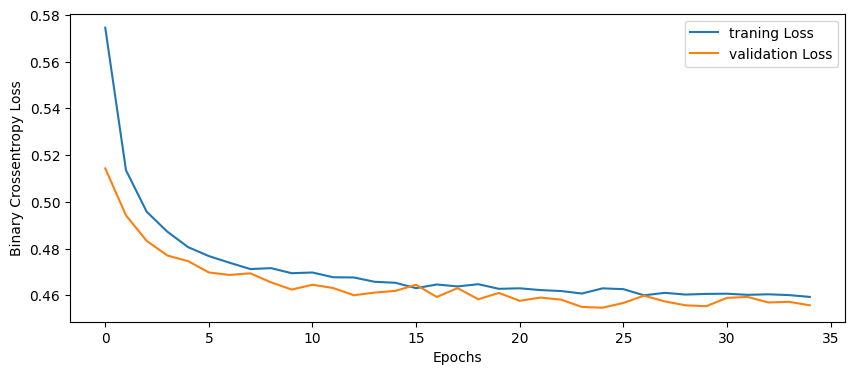

In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(hist.history["loss"], label="traning Loss")
plt.plot(hist.history["val_loss"], label="validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Binary Crossentropy Loss")
plt.legend()
plt.show()

In [173]:
model.evaluate(xtrain, ytrain)

842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8066 - loss: 0.4437


[0.44534385204315186, 0.805225670337677]

In [174]:
model.evaluate(xval, yval)

211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7901 - loss: 0.4590


[0.4546714425086975, 0.7940914630889893]

In [175]:
model.evaluate(xtest, ytest)

264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8049 - loss: 0.4505


[0.44940659403800964, 0.8009501099586487]

In [176]:
yprob_train = model.predict(xtrain)
yprob_train[0:5]

842/842 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.00967439],
       [0.10637807],
       [0.66791207],
       [0.05722605],
       [0.2535049 ]], dtype=float32)

In [177]:
thr = 0.5
ypred_train = (yprob_train >= thr).astype(int).flatten()
ypred_train

array([0, 0, 1, ..., 1, 0, 0])

# Tunning threshold on validation data

In [178]:
yprob_val = model.predict(xval)
yprob_val[0:5]

211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.08562785],
       [0.45446914],
       [0.7517504 ],
       [0.6351269 ],
       [0.24943633]], dtype=float32)

In [179]:
import numpy as np
thresholds = np.arange(0.01, 1.01, 0.01)
thresholds

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [180]:
from sklearn.metrics import f1_score

In [181]:
best_thr = 0.5
best_f1 = 0

for thr in thresholds:
  ypred_val = (yprob_val >= thr).astype(int).flatten()
  f1 = f1_score(yval, ypred_val, average="macro")
  if f1 > best_f1:
    best_f1 = f1
    best_yhr = thr

print(f"Best threshold: {best_thr}")
print(f"Best f1 score: {best_f1}")


Best threshold: 0.5
Best f1 score: 0.7862694713907572


# Predict the results for test based on best threshold

In [182]:
yprob_test = model.predict(xtest)
yprob_test[0:5]

264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.90362114],
       [0.7703092 ],
       [0.49507347],
       [0.807073  ],
       [0.39408475]], dtype=float32)

In [183]:
best_thr

0.5

In [184]:
ypred_test = (yprob_test >= best_thr).astype(int).flatten()
ypred_test[0:5]

array([1, 1, 0, 1, 0])

In [185]:
ytest.head()

,booking_status
30007,0
802,1
11035,0
22309,1
30695,0


# Evaluate model on Test

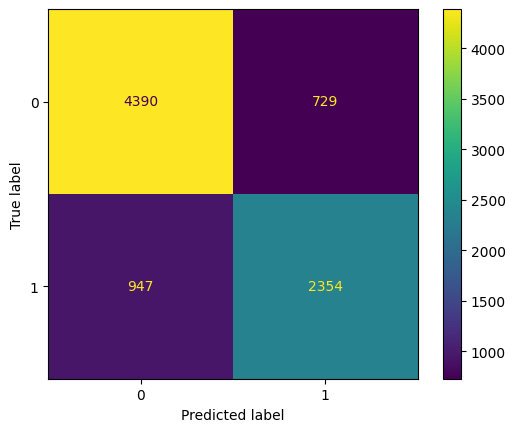

In [186]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [187]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      5119
           1       0.76      0.71      0.74      3301

    accuracy                           0.80      8420
   macro avg       0.79      0.79      0.79      8420
weighted avg       0.80      0.80      0.80      8420



# Out of sample Predicction

In [188]:
url2 ="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/booking_test.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/booking_test.csv


In [189]:
xnew = pd.read_csv(url2)
xnew

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,70163,2,0,1,2,0,0,0,315,2018,9,30,1,0,0,0,160.00,0
28064,70164,2,0,2,2,0,0,0,81,2018,3,25,0,0,0,0,65.00,1
28065,70165,2,0,1,2,0,0,0,40,2018,10,22,0,0,0,0,85.00,0
28066,70166,3,0,0,4,0,0,1,4,2018,9,6,1,0,0,0,162.75,0


In [190]:
xnew2 = xnew.drop(columns = ["id"])
xnew2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [191]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [192]:
xnew_pre = num_pipe.transform(xnew2)
xnew_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


In [193]:
probs = model.predict(xnew_pre)
probs

878/878 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.06707129],
       [0.03180824],
       [0.210064  ],
       ...,
       [0.14824887],
       [0.64068764],
       [0.83965427]], dtype=float32)

In [194]:
best_thr

0.5

In [195]:
preds = (probs >= best_thr).astype(int).flatten()
preds

array([0, 0, 0, ..., 0, 1, 1])

In [196]:
res = xnew[["id"]]
res["bookinng_status"] = preds
res["prob"] = probs.round(4)

In [197]:
res

,id,bookinng_status,prob
0,42100,0,0.0671
1,42101,0,0.0318
2,42102,0,0.2101
3,42103,0,0.1789
4,42104,1,0.6817
...,...,...,...
28063,70163,1,0.9739
28064,70164,0,0.0715
28065,70165,0,0.1482
28066,70166,1,0.6407


# Save the model object and preprocesor

In [199]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [200]:
import joblib
joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [201]:
model.save("booking_model.keras")

# Loading the objects

In [202]:
p = joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [203]:
from tensorflow.keras.models import load_model

m = load_model("booking_model.keras")
m.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,797 (38.27 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,532 (25.52 KB)

In [204]:
m.evaluate(xtest, ytest)

264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8049 - loss: 0.4505


[0.44940659403800964, 0.8009501099586487]